<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/Validating-the-input/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 1000 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 258s 8s/step
Extracted Features (Shape): (1000, 2048)
[[0.0000000e+00 0.0000000e+00 1.8026853e-03 ... 1.7235633e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.6866541e-02 ... 1.7718146e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 7.6275505e-03 ... 1.6937103e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 1.0173766e-02 ... 2.0307996e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.0027745e-03 ... 2.1718142e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8187796e+00
  0.0000000e+00 0.0000000e+00]]


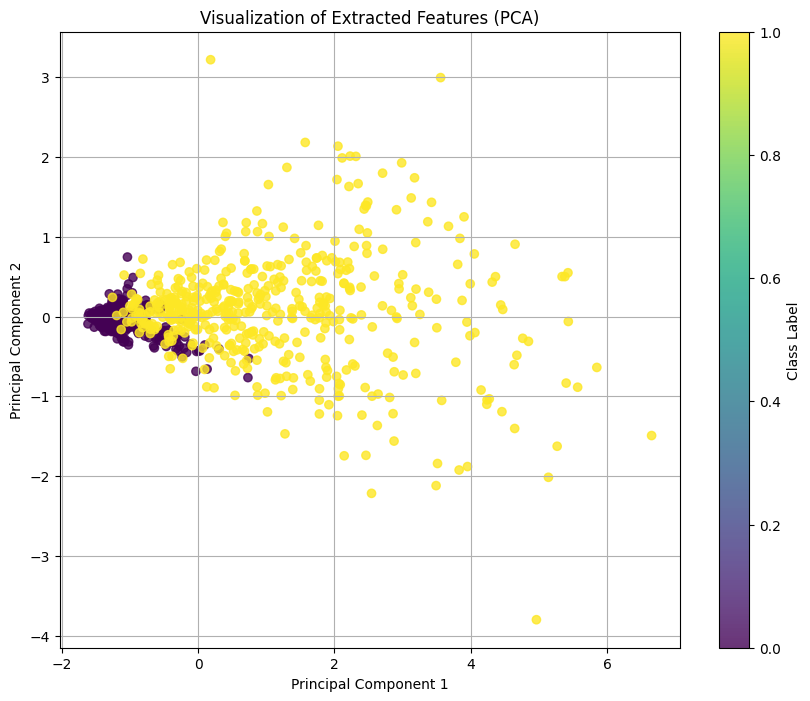

In [5]:
data_dir = "/content/drive/My Drive/DSGP/Data"

IMG_SIZE = (224, 224)  # Resizing images to 224x224 for ResNet50
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize pixel values

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Load ResNet50 model without the top (fully connected) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a Global Average Pooling layer to extract features
model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

# Extract features
features = model.predict(train_data, verbose=1)

print("Extracted Features (Shape):", features.shape)
print(features)

labels = train_data.classes

# Reduce dimensionality using PCA (Because the features extracted from the ResNet50 are high dimensional and quite difficult to visualize)
pca = PCA(n_components=2)
reduced_features_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Class Label')
plt.title('Visualization of Extracted Features (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
